# PCA: dimensionality reduction

# Import Libraries

In [29]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip
import datetime

'''Data Prep'''
from sklearn import preprocessing as pp

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

# Load & Explore Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/Data Mining"

/content/drive/.shortcut-targets-by-id/1dhMRa0vkFpcvKKuMxN77-AaWUxwSRh9o/Data Mining


In [4]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1dhMRa0vkFpcvKKuMxN77-AaWUxwSRh9o/Data Mining'

In [5]:
# Load the datasets
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets','mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [6]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [7]:
# Create Pandas DataFrames from the datasets
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [8]:
# Describe the training matrix
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022784,0.015424,0.012080,0.007218,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [9]:
# Show the labels
y_train.head()

,0
0,5
1,0
2,4
3,1
4,9


In [10]:
# Define function to view digit
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

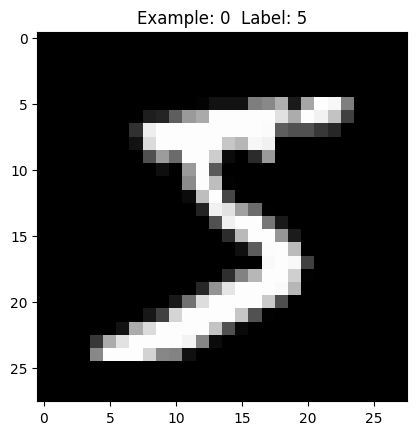

In [11]:
# View the first digit
view_digit(0)

In [12]:
# Define one-hot encoder function
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

In [13]:
# Define reversal of one-hot encoder function
def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

In [14]:
one_hot([9,4,2])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [15]:
# Create one-hot vectors for the labels
y_train_oneHot = one_hot(y_train)
y_validation_oneHot = one_hot(y_validation)
y_test_oneHot = one_hot(y_test)

In [16]:
# Show one-hot vector for example 0, which is the number 5
print(y_train[:5],y_train_oneHot[:5])

0    5
1    0
2    4
3    1
4    9
dtype: int64 [[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]


# PCA:Linear Dimensionality Reduction

In [17]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
random_state = 2018

pca = PCA(n_components=n_components)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [18]:
X_train_PCA.shape

(50000, 784)

In [19]:
X_train_PCA.loc[:10,0:2]

,0,1,2
0,0.461512,-1.246864,0.046376
1,3.921649,-1.251658,2.335506
2,-0.203707,1.547942,-0.980393
3,-3.148429,-2.296125,1.091200
4,-1.442697,2.872058,0.175520
5,0.757685,0.854583,2.342870
6,-2.876399,-0.571466,-1.021312
7,2.012188,-1.241508,-0.048272
8,-3.433580,-0.279385,-0.612012
9,-1.140924,1.854721,2.653345


In [20]:
X_train_PCA.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,...,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,3.868103e-08,1.087189e-07,5.447388e-08,3.570556e-08,-4.852295e-08,6.256104e-09,-7.759094e-08,-6.256104e-09,-1.792908e-08,2.525330e-08,...,1.054645e-09,3.903744e-10,3.633093e-10,3.598500e-10,3.648481e-10,3.650741e-10,4.168306e-10,5.716458e-11,2.412164e-10,-7.935210e-11
std,2.260154e+00,1.923793e+00,1.805180e+00,1.679311e+00,1.595849e+00,1.504814e+00,1.310802e+00,1.230092e+00,1.204784e+00,1.113683e+00,...,8.110323e-08,8.110916e-08,8.110931e-08,8.110931e-08,8.110926e-08,8.030483e-08,6.812918e-08,5.320209e-08,4.772593e-08,2.673380e-08
min,-4.263457e+00,-5.392479e+00,-5.384059e+00,-5.904963e+00,-5.067549e+00,-4.873594e+00,-4.325919e+00,-4.110078e+00,-4.601767e+00,-3.839773e+00,...,-1.319130e-06,-2.406797e-07,-5.149897e-07,-2.877399e-07,-2.169775e-07,-2.794172e-07,-4.909948e-06,-4.173511e-06,-2.944050e-06,-1.852071e-06
25%,-1.546649e+00,-1.424030e+00,-1.290886e+00,-1.205468e+00,-1.070141e+00,-1.041481e+00,-9.356979e-01,-8.304857e-01,-8.328437e-01,-7.128336e-01,...,-4.512768e-09,-2.422368e-09,-4.095071e-09,-3.937120e-09,-2.541884e-09,-4.167387e-09,-4.161569e-09,-3.241464e-09,-2.690157e-09,-1.543487e-09
50%,-1.804314e-01,-3.319098e-01,1.896636e-02,-1.441961e-02,4.755237e-02,4.013481e-02,-6.495514e-02,-8.783829e-02,-3.006674e-02,4.497838e-02,...,4.103119e-10,3.060014e-10,5.553512e-10,1.585739e-10,2.310270e-10,4.323472e-10,2.091844e-10,4.717638e-11,1.815691e-10,6.573283e-11
75%,1.310294e+00,1.495635e+00,1.275941e+00,1.063599e+00,1.087313e+00,1.047874e+00,8.808307e-01,7.781944e-01,8.108920e-01,7.876173e-01,...,5.049770e-09,2.911255e-09,5.151744e-09,4.223003e-09,2.961527e-09,4.872875e-09,4.431496e-09,3.372025e-09,2.944511e-09,1.648758e-09
max,9.221977e+00,5.649923e+00,6.054201e+00,5.978150e+00,5.357466e+00,4.978157e+00,5.010921e+00,4.504293e+00,5.754168e+00,4.061397e+00,...,1.330315e-05,1.806259e-05,1.786206e-05,1.800284e-05,1.806270e-05,1.777861e-05,5.609430e-06,6.586942e-06,3.691572e-06,2.400638e-06


In [21]:
len(pca.explained_variance_ratio_)

784

In [22]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  1.0000001271689252


In [23]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4887624]
Variance Captured by First 20 Principal Components:  [0.6439803]
Variance Captured by First 50 Principal Components:  [0.824861]
Variance Captured by First 100 Principal Components:  [0.91465867]
Variance Captured by First 200 Principal Components:  [0.9665009]
Variance Captured by First 300 Principal Components:  [0.98624897]


In [24]:
importanceOfPrincipalComponents

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.097444,0.070598,0.062161,0.053795,0.048581,0.043196,0.032776,0.028864,0.027688,0.023659,...,1.254956e-16,1.254956e-16,1.254956e-16,1.254956e-16,1.254956e-16,1.230186e-16,8.854446e-17,5.399291e-17,4.345088e-17,1.363339e-17


<Axes: >

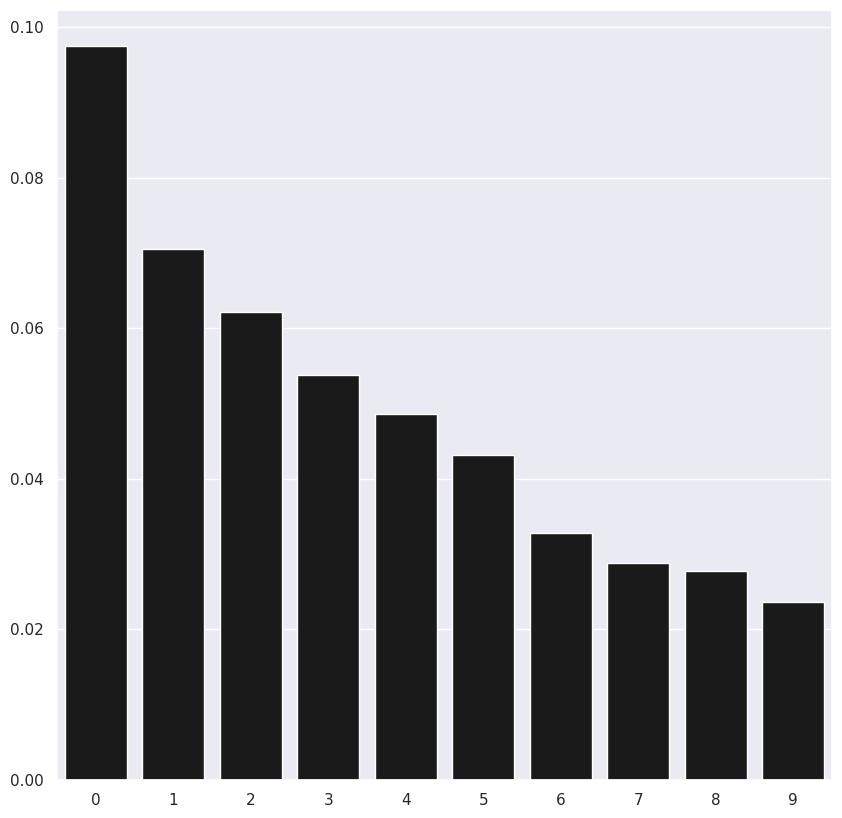

In [25]:
# View percentage captured by first 10 components
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k') #0,1,2,3,...,9

In [26]:
# Define scatterplot function
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca() #得到當前的 axes
    ax.set_title("Separation of Observations using "+algoName)

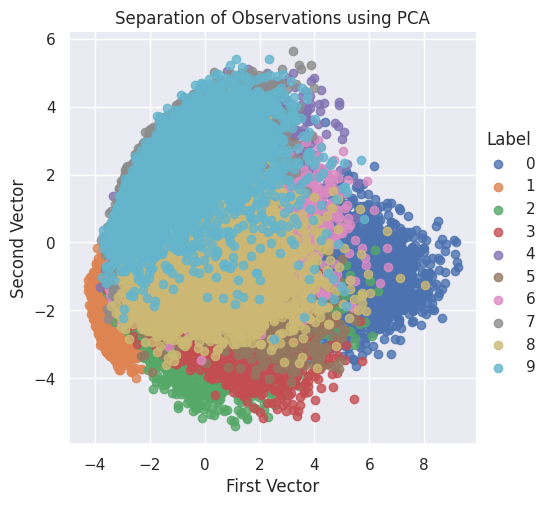

In [27]:
# View scatterplot
scatterPlot(X_train_PCA, y_train, "PCA")

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

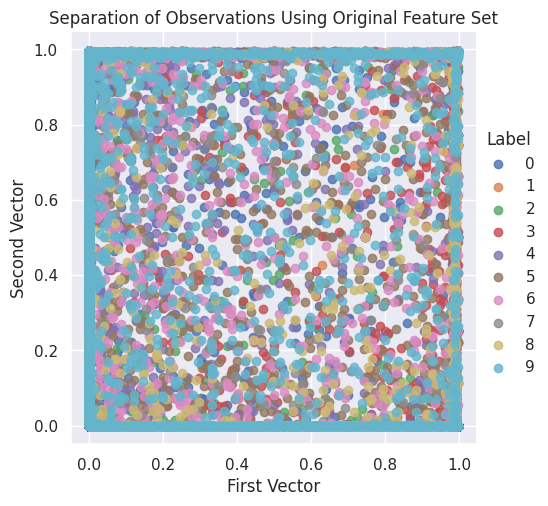

In [28]:
# View two random dimensions
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,400]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

# Conclusion